# Car Evaluation Data Analysis and Predictions


This notebook provides an in-depth exploratory analysis using the Car Evaluation dataset, geared towards a classification problem. Our primary aim is to investigate various car attributes, such as cost, maintenance, and safety.  We seek to predict car evaluations and gain insights into how specific attributes potentially impact these ratings. Additionally, we ensure data privacy using the antigranular tool.

### Getting Started: Setting Up the Environment

Before diving into data analysis, we need to ensure our environment is set up with all necessary packages and modules.
For this notebook, Google Colab has been chosen as the platform due to its ease of use and built-in data science tools. However, feel free to use any platform that supports Jupyter notebooks, such as JupyterLab or classic Jupyter Notebook, on your local machine.


### What is Antigranular?

Antigranular is your private data exploration toolkit! 🚀

With Antigranular, you can use Python to securely explore and gain insights from your data without ever seeing sensitive information. 🕵️‍♂️🔐

Antigranular leverages AWS enclaves, which are isolated and protected environments that run on the cloud. AWS enclaves ensure that your data and code are safe from unauthorised access, even from AWS itself. 🛡️☁️

Antigranular also integrates with powerful differential privacy libraries, such as OpenDP, SmartNoise, and DiffPrivLib. Differential privacy is a technique that adds controlled noise to your data analysis, preserving the privacy of individual records while still allowing you to draw meaningful conclusions. 📊🔇

With Antigranular, you can work with private datasets confidently and conveniently, knowing that your data analysis remains confidential and insightful! 😊👍

### How to Use `antigranular`?

#### Install the Package 📦
First, we need to add `antigranular` to our local jupyter kernel. You can do this by installing it directly from PyPI, which is like an app store but for python packages!

### Installing Antigranular

In [1]:
!pip install antigranular -U

  Attempting uninstall: antigranular
    Found existing installation: antigranular 0.2.9
    Uninstalling antigranular-0.2.9:
      Successfully uninstalled antigranular-0.2.9


You should consider upgrading via the 'C:\Users\bhasw\tt\venv\Scripts\python.exe -m pip install --upgrade pip' command.


### Importing Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's ensure we have all the tools (aka packages) we need for our exploration. Think of packages as toolboxes that contain special tools designed to help us handle and visualise our data more easily.

### What are These Packages?
- **pandas**: A crucial library in data science for data manipulation and analysis. The pd is an alias that will represent pandas throughout our code, making it shorter and more convenient to use.
- **matplotlib.pyplot**: Used for creating static, animated, and interactive visualisations.
- **numpy**: Enables numerical computing in Python.
- **seaborn**: Based on matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.


#### Connecting to a Dataset 🌐

1. **Create Your Account**: To begin, sign up or sign in to [Antigranular](https://www.antigranular.com/). You can create an account using your email and a password, or simply use your Google or GitHub account. Easy peasy!
   
2. **Find Your Dataset**: Next, wander through Antigranular and find the dataset you're curious about. Click on it, and you'll find lots of useful info like what kind of data is inside and how it's licensed.

3. **Grab the Connection Code**: On the dataset page, look for a code snippet usually found at the top right corner. Click to copy it! This code is like a secret key.
   
4. **Paste and Run**: Finally, come back here, paste the code into a cell in this notebook, and run it. Voila! You're now connected and ready to explore!

### Using Antigranular for Secure Computations
- Here, ag.login initiates a secure session with Antigranular where we can work with our data confidentially. The dataset parameter is specified as "Car Evaluation" - indicating the dataset we'll be exploring.
- The `%%ag` at the beginning of a cell indicates that the code within this cell will be executed securely on the Antigranular platform, ensuring the confidentiality of our computations.


In [2]:
import antigranular as ag
session = ag.login("<client_id>", "<client_secret>", dataset = "Car Evaluation")

Loading dataset "Car Evaluation" to the kernel...
Dataset "Car Evaluation" loaded to the kernel as car_evaluation
Connected to Antigranular server session id: 2fb4d9bb-ae70-4134-be85-58345443979e, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


🔑 Note: Replace \<client_id>, \<client_secret>, with actual values that you will get from [antigranular.com](https://antigranular.com) to get connected.
🔐 _Ensure to substitute `<client_id>` and `<client_secret>` with your respective Antigranular credentials._



Importing necessary libraries within the secure Antigranular environment using %%ag magic cell.

In [ ]:
%%ag
import pandas as pd
import op_snsql

### Loading the Data

We are loading our dataset, which is securely stored and handled by Antigranular, from the dictionary format `car_evaluation`. We will extract the training and testing datasets (`train_x`, `train_y`, and `test_x`) and display the column names using `ag_print`, which works the same as Python's inbuilt `print`, to understand the features we'll be working with. Note that `test_x` is a dataframe in order to see the categorical string values.


In [ ]:
%%ag
train_x = car_evaluation["train_x"]
train_y = car_evaluation["train_y"]
test_x = car_evaluation["test_x"]

ag_print(train_x.columns)
ag_print(train_y.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Index(['class'], dtype='object')



### Checking the Privacy Budget

Privacy-preserving algorithms used by libraries often consume a "privacy budget" to ensure that data privacy is maintained.


In [ ]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

The privacy_odometer() function allows us to keep track of the total privacy cost (epsilon and delta) used in our session, ensuring that our operations remain within acceptable privacy bounds.

Note that our total_epsilon and total_delta are initialized to 0.0.

### Data Preprocessing

Data preprocessing is a crucial step in any data analysis process. It involves preparing and cleaning the data to facilitate subsequent analysis and model building. Here, we'll manipulate our data in various ways to make it suitable for model training.

Understanding the categories within each feature of our dataset is vital to perform appropriate encoding later on.


In [ ]:
%%ag
unique_categories = {}
for column in test_x.columns:
    unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)


{'buying': ['high', 'med', 'low', 'vhigh'], 'maint': ['high', 'low', 'vhigh', 'med'], 'doors': ['4', '2', '5more', '3'], 'persons': ['2', '4', 'more'], 'lug_boot': ['med', 'big', 'small'], 'safety': ['high', 'med', 'low']}



Here, we're identifying and printing the unique values (categories) present in each feature column of our dataset. We store these unique categories in a dictionary, unique_categories, to reference them in future encoding steps.

#### Preparing for Encoding: Mapping Scheme

Encoding is a process to convert categorical data into a format that can be fed into machine learning models. We define a mapping scheme which assigns a unique integer to each category within a feature.


In [ ]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'buying': {'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}, 'doors': {'4': 0, '2': 1, '5more': 2, '3': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 0, 'big': 1, 'small': 2}, 'safety': {'high': 0, 'med': 1, 'low': 2}}



In this cell, we generate a dictionary, encoding_scheme_train_x_gen, which contains a unique integer encoding for each category in our features, facilitating future one-hot encoding of our categorical data.



As we can observe, when we have categories such as ['low', 'medium', 'high'], it is logical to encode them in a manner that preserves their inherent order, such as \(\{'low': 0, 'medium': 1, 'high': 2\}\). However, incorrect encoding, such as assigning a higher number to 'low' and a lower number to 'high', has been applied in the case of 'encoding_scheme_train_x_gen'. We will adjust the encoding schema to ensure it accurately represents the underlying data."

In [ ]:
%%ag
encoding_scheme_train_x = {'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}


#### Verifying the Encoding Scheme

Before applying the encoding to our dataset, it's a good practice to verify the encoding scheme.


In [ ]:
%%ag
ag_print(encoding_scheme_train_x)

{'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}



### Applying the Encoding Scheme to Data

Now, we use the previously defined encoding scheme to convert our categorical features into numerical format in a privacy-preserving manner.


In [ ]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

We map the categorical values to their corresponding numerical encodings as per encoding_scheme_train_x. The eps=1 parameter specifies the privacy budget used for this operation.

To verify private dataframe is numeric, we use describe, we just want to print them so we will spent very less eps.

In [ ]:
%%ag
ag_print(train_x.describe(eps=.1))

            buying        maint        doors      persons     lug_boot  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean      3.296840     0.000000     1.595555     1.769713     3.749919   
std       0.468286     0.981783     0.792686     1.060233     0.779101   
min       0.246897     2.854647     0.068885     3.281265     0.603297   
25%       3.267933     0.245711     2.120006     0.116181     0.855211   
50%       0.050528     2.361320     3.881897     1.245187     1.225848   
75%       3.902937     2.845432     3.472044     1.820883     0.094070   
max       3.647521     1.778431     2.399280     2.265779     2.612206   

            safety  
count  1382.000000  
mean      2.418008  
std       1.728763  
min       1.110151  
25%       0.994116  
50%       0.465016  
75%       2.178140  
max       3.181611  



### Encoding the Target Variable: `train_y`
Target variable (`train_y`) also needs to be in a numerical format. So, we'll apply encoding to `train_y` to convert its categorical values into numerical format.

In [ ]:
%%ag
train_y_schema = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

train_y[train_y.columns[0]] = train_y[train_y.columns[0]].map(train_y_schema, eps=1)

Here, train_y_schema is our predefined mapping that encodes 'unacc' to 0, 'acc' to 1, 'good' to 2, and 'vgood' to 3. We then apply this mapping to train_y using the .map() function. The eps=1 parameter specifies the privacy budget used for this operation. This encoding converts the categorical target variable into a numerical format.

In [ ]:
%%ag
ag_print(train_y.describe(eps=.1))

             class
count  1160.000000
mean      0.371917
std       1.199723
min       0.519891
25%       3.235633
50%       0.874512
75%       2.204759
max       2.289343



## Data Visualisation

Data visualisation is a pivotal step in exploratory data analysis. By visualising our data, we can observe patterns, anomalies, and relationships between variables that might not be apparent from the raw data alone.

### Combining Datasets: `train_x` and `train_y`

To facilitate certain analyses and visualisations, it might be useful to combine our feature variables (`train_x`) and target variable (`train_y`) into a single dataset. This can allow us to explore relationships between feature variables and the target variable more efficiently.


In [ ]:
%%ag
train_data = train_x.join(train_y, how="inner")

Using the join function, we merge train_x and train_y on their index, using an inner join specified by how="inner". This results in a new dataset, train_data, which contains both our feature variables and the target variable, facilitating comprehensive analysis and visualisation in the following sections.

### Analysing the Mean of Features for a Specific Class
We now calculate the mean values of each feature for classes (0, 1, 2, and 3) in our target variable.

In [ ]:
%%ag
mean_class_0 = train_data.where(train_data['class'] == 0).mean(eps=1)
ag_print(mean_class_0)
export(mean_class_0, 'mean_class_0')

Setting up exported variable in local environment: mean_class_0
buying      1.617421
maint       1.644305
doors       1.204242
persons     0.810520
lug_boot    0.924726
safety      0.738420
class       0.000000
dtype: float64



In [ ]:
%%ag
mean_class_1 = train_data.where(train_data['class'] == 1).mean(eps=1)
mean_class_2 = train_data.where(train_data['class'] == 2).mean(eps=1)
mean_class_3 = train_data.where(train_data['class'] == 3).mean(eps=1)
export(mean_class_1, 'mean_class_1')
export(mean_class_2, 'mean_class_2')
export(mean_class_3, 'mean_class_3')


Setting up exported variable in local environment: mean_class_1
Setting up exported variable in local environment: mean_class_2
Setting up exported variable in local environment: mean_class_3


Now, we aim to convert the mean values calculated for different classes into a Pandas DataFrame, facilitating easier visualisation and analysis in the local environment.


In [ ]:
# to pandas dataframe
df = pd.DataFrame([mean_class_0, mean_class_1, mean_class_2, mean_class_3])

### Alternative Approach: Extracting Mean Values with SN-SQL

In addition to the method we used above to calculate mean values, we could have leveraged SQL-style queries using `snsql` to achieve the same results, potentially in a more concise manner.

```python
%%ag
import op_snsql
privacy = op_snsql.Privacy(epsilon=1.0)
reader = op_snsql.from_df(df=train_data, privacy=privacy)

%%ag
result = reader.execute("SELECT class, AVG(buying), AVG(maint), AVG(doors), AVG(persons), AVG(lug_boot), AVG(safety) FROM df.table GROUP BY class")
export(result, 'result')

new_columns = ['class'] + train_x_columns.tolist()
df = pd.DataFrame(result[1:], columns=new_columns)


### Considerations for Not Utilising snsql for Mean Calculation

While the SN-SQL method illustrated in the alternative approach is quite succinct and powerful, we opted for a different strategy for a reason:

Each application of the `AVG` function consumes a portion of the privacy budget (\( \epsilon \)). With six applications in a single query, the total privacy budget expenditure might be higher compared to calculating means separately.


Sometimes, after creating a DataFrame, there may be columns that are not necessary for further analysis and visualisation. In such cases, these can be dropped to make the DataFrame cleaner and more relevant to our needs.


In [ ]:
df.drop(columns=['class'], inplace=True)

### Creating a Bar Plot

To visualise the calculated means of the features for different classes, we utilise a bar plot. This allows us to easily compare the average values of features across various classes.


<Axes: >

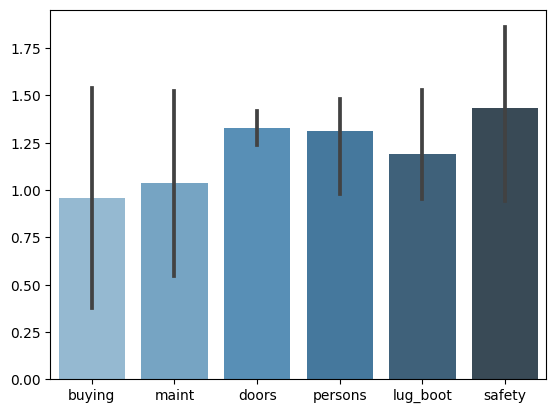

In [ ]:
# sns barplot
sns.barplot(data=df, palette="Blues_d")

- `sns.barplot(data=df, palette="Blues_d")`: This code generates a bar plot using the Seaborn library (`sns`).
  - `data=df`: The data used for the plot is our DataFrame `df`, which contains the calculated mean values for the features across different classes.
  - `palette="Blues_d"`: This parameter sets the color palette of the plot to different shades of blue, providing a visually appealing and clear way to observe the differences in mean values.

Observations:

- **buying**: There are noticeable differences in the mean buying price among different classes.
- **maint**: Similar to buying, maintenance cost also shows some variation.
- **safety**: Safety shows clear variations, and looks like most important.
  
The remaining features (**doors**, **persons**, **lug_boot**) exhibit less variation among classes.

### Bar Plot of Mean Values per Class

In the following code cell, we'll create a bar plot that visualises the mean values of various features per class using the DataFrame `df`. The plot is stylised with a size of 12x6, a 'viridis' colormap, and custom labels for clarity and aesthetic appeal. The X-axis represents different classes ('unacc', 'acc', 'good', 'vgood'), and the Y-axis showcases the mean values. A legend titled 'Features' and a Y-axis grid are added for better interpretability.

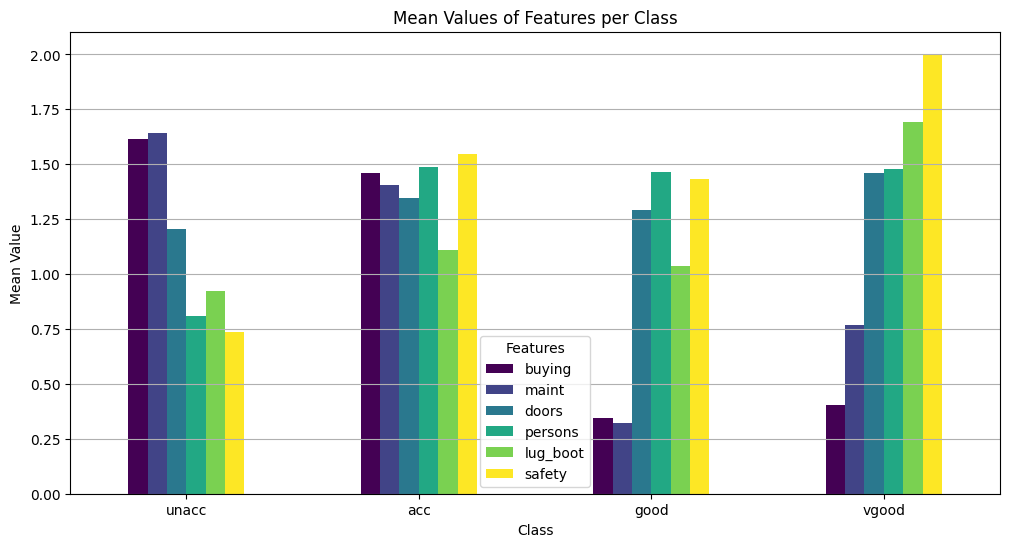

In [ ]:
ax = df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Features per Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unacc', 'acc', 'good', 'vgood'], rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')

### Observations and Summary from the Bar Plot:
1. **Safety Considerations:**
   - 'vgood' cars tend to have the highest mean safety rating, suggesting that safety is a crucial factor in determining the highest class of cars.
   - 'unacc' (unacceptable) cars have the lowest mean safety rating, highlighting that lower safety ratings are a significant factor for classifying cars into this undesirable category.

2. **Economic Aspects (Buying & Maintenance):**
   - 'unacc' cars tend to have higher mean buying and maintenance costs, indicating that more expensive and high-maintenance cars are often deemed less acceptable.
   - 'good' cars have the lowest mean buying and maintenance costs, hinting that more economically friendly cars are often classified in this category.

3. **Luggage Boot Size:**
   - 'vgood' cars have the highest mean luggage boot size, showing a potential preference for larger boot sizes in this class.
   - The other classes do not show significant variations in the luggage boot size.

4. **Capacity (Persons & Doors):**
   - 'unacc' cars have a lower mean value for persons, suggesting that cars with lower seating capacity tend to be categorised as unacceptable.
   - There isn't a clear pattern for the number of doors across classes, implying that this feature might not be as impactful in classifying cars.

### Summary:

- Safety is a pivotal factor across all classes, with higher safety ratings generally correlating with more favorable classes.
- Economic aspects (buying and maintenance costs) appear to significantly impact the classification, especially distinguishing 'unacc' and 'good' cars.
- Features like the number of doors might not be significant in determining car classes due to the lack of clear variation across different classes.

This analysis could inform the feature selection or weighting in a predictive model, focusing on safety and economic aspects as potentially influential variables.

In [ ]:
session.privacy_odometer()

{'total_epsilon_used': 11.2,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Rule Based Model

We explore a rule-based model for our analysis. A rule-based model might involve crafting rules that utilise the insights gained. This means we create some basic "rules" or "guidelines" to predict our car classes. For example, if we noticed that cars with high safety ratings tend to be in the 'very good' class, we might create a rule that says: "If a car has a high safety rating, predict it as 'very good'".

Before we use our rule-based model on the test data (the data we put aside to test how good our model is), we need to make sure it's in the right format.


In [ ]:
%%ag
for col, value in encoding_scheme_train_x.items():
    test_x[col] = test_x[col].map(value)

In [ ]:
%%ag
ag_print(test_x)

     buying  maint  doors  persons  lug_boot  safety
0         2      2      2        0         1       2
1         1      0      0        1         1       1
2         2      2      2        0         2       1
3         0      2      2        1         1       1
4         1      0      2        2         1       0
..      ...    ...    ...      ...       ...     ...
341       3      3      2        2         0       1
342       3      1      2        0         1       1
343       1      0      0        2         0       0
344       3      3      2        2         0       2
345       1      1      0        0         1       1

[346 rows x 6 columns]



We leverage op_snsql, an extension of SmartNoise SQL, to facilitate the execution of SQL queries for private dataframe.

In [ ]:
%%ag
privacy = op_snsql.Privacy(epsilon=1.0)
reader = op_snsql.from_df(df=train_data, privacy=privacy)

In [ ]:
%%ag
result = reader.execute("SELECT count(class) FROM df.table GROUP BY class")


Using the SQL-like command `"SELECT count(class) FROM df.table GROUP BY class"`, counts of each car class are securely obtained without revealing exact numbers, ensuring privacy. This step helps understand which car classes have more or fewer entries, guiding future analysis and model building.

Through `op_snsql`, counts are obtained in a privacy-aware manner, providing useful insights while maintaining data confidentiality.


In [ ]:
%%ag
ag_print(result)

[['???'], [976], [301], [59], [50]]



In [ ]:
%%ag
export(result, 'result')

Setting up exported variable in local environment: result


In [ ]:
session.privacy_odometer()

{'total_epsilon_used': 13.2,
 'total_delta_used': 1.5543122344752192e-15,
 'library_costs': None,
 'dataset_costs': None}

### Visualising Distribution of Different Car Classes with Percentages

Let's plot a bar chart to show how many cars are in each class ('unacc', 'acc', 'good', 'vgood'). The heights of the bars show the number of cars, and we’ve added percentages on top to easily see what part of all cars each class represents. It’s a quick way to see which classes have more or fewer cars.

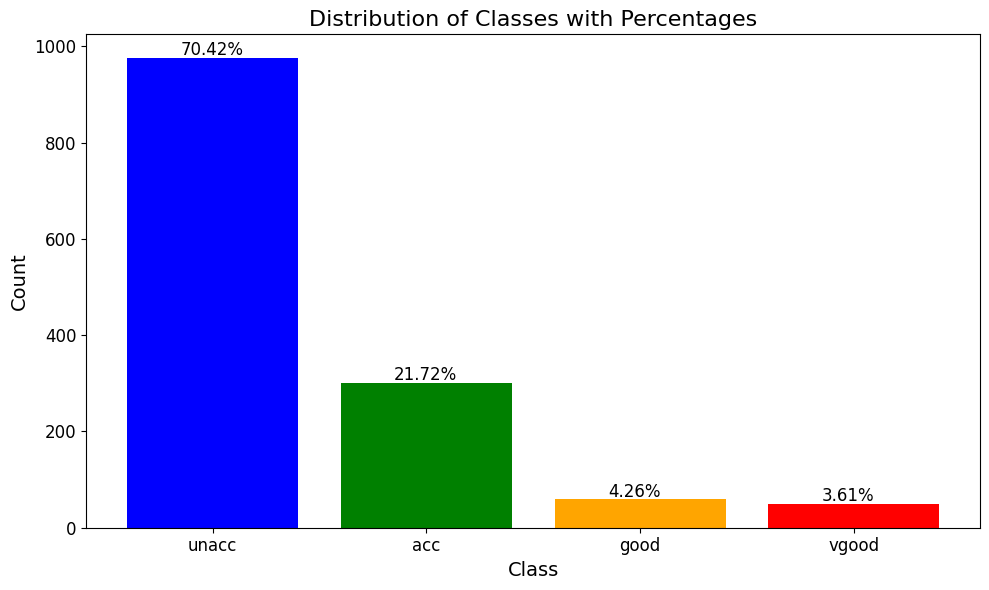

In [ ]:
data_counts = [item[0] for item in result[1:]]
labels = ['unacc', 'acc', 'good', 'vgood']

total_count = sum(data_counts)

# Calculate percentages
percentages = [(count/total_count)*100 for count in data_counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, data_counts, color=['blue', 'green', 'orange', 'red'])

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, # position percentage at the top
             bar.get_height() + 5,
             f'{percentage:.2f}%',
             fontsize=12)

plt.title('Distribution of Classes with Percentages', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Observations:
* The data is imbalanced, with the 'unacc' category dominating the distribution.
* 'vgood' and 'good' categories are considerably very less frequent in the data.

The class 'unacc' has the highest count and represents the majority of the data, hence can be default for rule based model.

In [ ]:
%%ag
# simple rule based
def rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        if row['safety'] == 0:
            predictions.append('unacc')
        elif row['buying'] == 0 and row['maint'] == 0:
            predictions.append('acc')
        else:
            predictions.append('unacc')
    return predictions

We're crafting a set of rules to predict the car classes. Interestingly, even if we were to submit all zeros (predicting all cars as 'unacc'), we would attain around 70% accuracy due to the prevalent count of 'unacc' class cars. However, by predicting the remaining classes ('acc', 'good', 'vgood') accurately, we can enhance our score further and create a more nuanced model.

Now we're using our rules to make guesses (or "predictions") about the car classes in our test data. Let’s see how good our rules are!

In [ ]:
%%ag
predictions = rule_based_model(test_x)

In [ ]:
%%ag
submit_predictions(pd.DataFrame(predictions))

score: {'leaderboard': 0.781286326383901, 'logs': {'BIN_ACC': 0.781286326383901}}



We sent in our guesses as pandas dataframe and got a score back. It tells us how good our rules were at guessing the car classes. A score closer to 1 means our guesses were pretty good!

In [ ]:
session.terminate_session()

{'status': 'ok'}

Now we're all done, we use this line to close our work session neatly. It's like turning off the lights when you leave a room – it’s a good habit to wrap things up properly!